In [2]:
import numpy as np
import scipy.signal
from matplotlib.pyplot import *
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display
from filter_function import *
from spectrogram import *

import matplotlib.image as mpimg
import glob
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, UpSampling2D, Input,Dropout,Conv2DTranspose,Concatenate
from keras.layers import  Conv1D, MaxPooling1D, UpSampling1D,Concatenate, PReLU
from keras import optimizers

Using TensorFlow backend.


In [3]:
original_dataset_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\recordings\\"

base_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\super_resolution_re_im"
train_dir = os.path.join(base_dir, 'train\\')

test_dir = os.path.join(base_dir, 'test\\')
train_dir_filtré=os.path.join(base_dir, 'train_dir_filtré\\')
test_dir_filtré=os.path.join(base_dir, 'test_dir_filtré\\')

In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(train_dir_filtré)
os.mkdir(test_dir_filtré)

In [ ]:
speakername=['_jackson_{}.wav','_nicolas_{}.wav','_theo_{}.wav','_yweweler_{}.wav']
for i in range(10):    
    for s in speakername:
        fnames_test=[str(i)+s.format(j) for j in range(5)]
        fnames_train=[str(i)+s.format(j) for j in range(5,50)]
        
        for fname in fnames_test:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(test_dir, fname)
            
            shutil.copyfile(src, dst)
            
        for fname in fnames_train:
             src = os.path.join(original_dataset_dir, fname)
             dst = os.path.join(train_dir, fname)
            
             shutil.copyfile(src, dst)
             
    i=i+1;


In [4]:
fce=0.0226 #sr=22050
ftype="butter"
ordre=2
b,a = creer_filter(fce,"highpass",ftype,ordre)
filter_path(train_dir,train_dir_filtré,b,a)
filter_path(test_dir,test_dir_filtré,b,a)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\


In [5]:
Xtest,testmaxr,testmaxi=dir_to_spectro_RI(test_dir)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\


In [6]:
print(Xtest[10][10])

[[-1.68969240e-02  1.37014238e-18]
 [ 1.14567764e-02 -3.60413594e-03]
 [-2.05927179e-03  2.31237942e-03]
 [-1.55291834e-03  1.97633199e-04]
 [ 1.45434856e-03  5.11254184e-03]
 [ 1.02588290e-03 -1.40695022e-02]
 [-2.53181392e-03  1.07910717e-02]
 [ 6.51929644e-04 -2.35448941e-03]
 [ 3.52810730e-06  1.34198172e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


In [7]:
print(Xtest.shape)

(200, 1024, 16, 2)


In [8]:
Xtrain,trainmaxr,trainmaxi=dir_to_spectro_RI(train_dir)
Xtrain_fil,trainmaxr_fil,trainmaxi_fil=dir_to_spectro_RI(train_dir_filtré)
Xtest_fil,testmaxr_fil,testmaxi_fil=dir_to_spectro_RI(test_dir_filtré)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\5_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\7_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\9_theo_16.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\9_theo_28.wav
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\5_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\tr

In [9]:
print(Xtest_fil[10][10])

[[-4.75316355e-03 -1.24887509e-19]
 [ 2.54680845e-03 -9.81870180e-05]
 [-2.69427925e-04  2.50527082e-04]
 [-6.09608251e-05 -1.23854683e-04]
 [ 2.45518604e-04 -2.16387096e-04]
 [ 1.16974695e-06 -4.25049860e-04]
 [-1.74329252e-04  1.56760192e-03]
 [ 7.77964378e-05 -1.00152125e-03]
 [ 1.00065272e-05  2.03098280e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


In [70]:

#pas séquentiel
#comme une image rgb sauf que couleurs sont ici partie reelle et imag
input_img = Input(shape=(1024, 16,2))  
conv1= Conv2D(32, (3, 3), padding='same',activation='tanh')(input_img)
# conv1 = PReLU(shared_axes=[1, 2], name='prelu1')(conv1)
max1= MaxPooling2D((2, 1), padding='same')(conv1)
conv2 = Conv2D(32, (3, 3), padding='same')(max1)
conv2 = PReLU(shared_axes=[1, 2], name='prelu2')(conv2)
max2= MaxPooling2D((2, 1), padding='same')(conv2)
conv3 = Conv2D(32, (3, 3), padding='same')(max2)
conv3 = PReLU(shared_axes=[1, 2], name='prelu8')(conv3)
max3= MaxPooling2D((2, 1), padding='same')(conv3)
conv4 = Conv2D(32, (3, 3),padding='same')(max3)
conv4 = PReLU(shared_axes=[1, 2], name='prelu7')(conv4)
# # max4= MaxPooling2D((2, 1), padding='same')(conv4)
# conv5 = Conv2D(32, (3, 3),padding='same')(conv4)
# x = PReLU(shared_axes=[1, 2], name='prelu10')(conv5)
# # x = UpSampling2D((2, 1))(x)
# x = Conv2D(32, (3, 3), padding='same')(x)
# x = PReLU(shared_axes=[1, 2], name='prelu11')(x)
x = UpSampling2D((2, 1))(conv4)
# merge1=Concatenate(axis=-1)([x,conv3])
x = Conv2D(32, (3, 3), padding='same')(x)
x = PReLU(shared_axes=[1, 2], name='prelu4')(x)
x = UpSampling2D((2, 1))(x)
merge2=Concatenate(axis=-1)([x,conv2])
x = Conv2D(32, (3, 3), padding='same')(merge2)
x = PReLU(shared_axes=[1, 2], name='prelu5')(x)
x = UpSampling2D((2,1))(x)
#merge2=Concatenate(axis=-1)([x,conv1])
decoded = Conv2D(2, (3, 3),padding='same')(x)
decoded = PReLU(shared_axes=[1, 2], name='prelu')(decoded)
# decoded =Dropout(0.5)(decoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=optimizers.Adadelta(lr=10),loss='mae')
#optimizer=optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1024, 16, 2)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 1024, 16, 32)      608       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 512, 16, 32)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 512, 16, 32)       9248      
_________________________________________________________________
prelu2 (PReLU)               (None, 512, 16, 32)       32        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 256, 16, 32)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 256, 16, 32)       9248      
__________

In [71]:
G=10
autoencoder.fit(Xtrain_fil*G,Xtrain*G,epochs=20,
                batch_size=16,
                shuffle=True,
                validation_data=(Xtest_fil*G, Xtest*G))

Train on 1800 samples, validate on 200 samples
Epoch 1/20
1800/1800 [==============================] - 21s 12ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 2/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 3/20
1800/1800 [==============================] - 19s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 4/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 5/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 6/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 7/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 8/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 9/20
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0807 - val_loss: 0.0838
Epoch 10/20
1800/

In [72]:
decoded = autoencoder.predict(Xtest_fil)
p=0#indice to display
print(decoded[p][100])
print(Xtest[p][100])
print(decoded.shape)

[[-3.7142236e-06  1.2071803e-06]
 [-9.3488443e-06  1.7131182e-06]
 [-9.6583735e-06  1.7449867e-06]
 [-9.5189116e-06  1.6183182e-06]
 [-9.4027073e-06  1.6331521e-06]
 [-9.4335010e-06  1.6218823e-06]
 [-9.3901181e-06  1.5445668e-06]
 [-9.4105917e-06  1.5592140e-06]
 [-9.3901226e-06  1.6031820e-06]
 [-9.4831539e-06  1.6490958e-06]
 [-9.4904008e-06  1.6309275e-06]
 [-9.4829293e-06  1.6330315e-06]
 [-9.4888401e-06  1.6371405e-06]
 [-9.4918487e-06  1.6412616e-06]
 [-9.2080554e-06  1.5636580e-06]
 [-8.1625003e-06  1.7878398e-06]]
[[ 6.04809187e-02  1.54488404e-17]
 [ 2.95964666e-02 -1.41340978e-02]
 [-1.47888558e-02 -1.67798270e-02]
 [-3.62167656e-02 -3.11062881e-03]
 [-1.52316382e-02  9.16804560e-03]
 [-2.11727433e-03 -3.28151463e-03]
 [ 2.45762174e-04 -1.68522843e-03]
 [ 1.87064670e-02  7.08211726e-03]
 [ 6.86734263e-03  6.94964081e-03]
 [-2.35070614e-03 -7.23413832e-04]
 [ 7.06664068e-05 -2.34084460e-03]
 [-2.14303305e-04 -6.01612206e-04]
 [ 1.46038502e-07 -1.44031264e-06]
 [ 0.00000000e+0

In [73]:
ic=complex(0,1)
p=122
size_freq=1024
size_time=16
Spec_test=np.zeros((size_freq,size_time),dtype=complex)
Spec_test_fil=np.zeros((size_freq,size_time),dtype=complex)
Spec_decoded=np.zeros((size_freq,size_time),dtype=complex)
for i in range(size_freq):
    for j in range(size_time):
            Spec_test[i][j]=Xtest[p][i][j][0]*testmaxr[p]+Xtest[p][i][j][1]*ic*testmaxi[p]
            Spec_test_fil[i][j]=Xtest_fil[p][i][j][0]*testmaxr_fil[p]+Xtest_fil[p][i][j][1]*ic*testmaxi_fil[p]
            Spec_decoded[i][j]=decoded[p][i][j][0]*testmaxr[p]+decoded[p][i][j][1]*ic*testmaxi[p]
            j=j+1 
    i=i+1

print(Spec_test.shape)

(1024, 16)


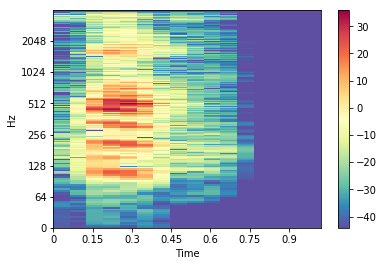

In [74]:
Spec_testdb= librosa.amplitude_to_db(abs(Spec_test))
librosa.display.specshow(Spec_testdb, sr=8000, x_axis='time', y_axis='log',cmap='Spectral_r')
colorbar()

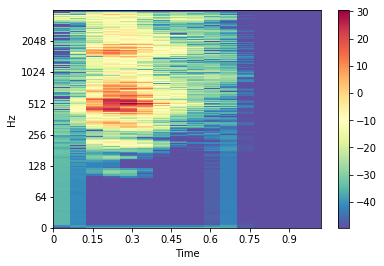

In [75]:
Spec_testdb2= librosa.amplitude_to_db(abs(Spec_test_fil))

librosa.display.specshow(Spec_testdb2, sr=8000, x_axis='time', y_axis='log',cmap='Spectral_r')
colorbar()


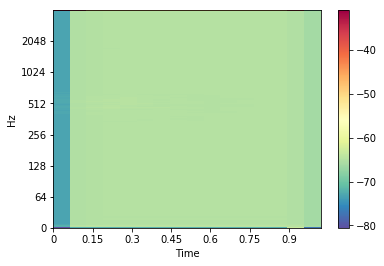

In [76]:
Spec_testdb3= librosa.amplitude_to_db(abs(Spec_decoded))

librosa.display.specshow(Spec_testdb3, sr=8000, x_axis='time', y_axis='log',cmap='Spectral_r')
colorbar()

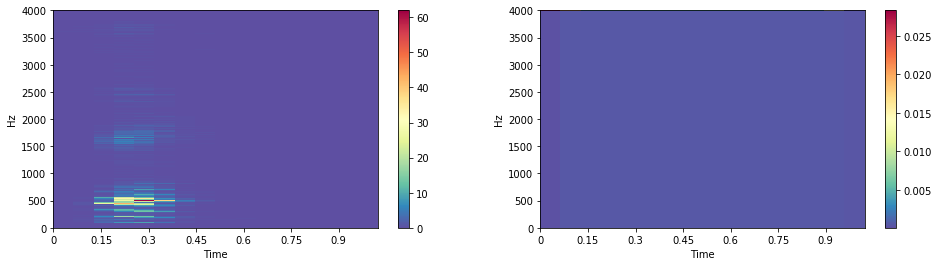

In [77]:
Spec_testdb3= librosa.amplitude_to_db(abs(Spec_decoded))
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
librosa.display.specshow(Spec_test, sr=8000, x_axis='time', y_axis='hz',cmap='Spectral_r')
colorbar()
plt.subplot(1,2,2)
librosa.display.specshow(Spec_decoded, sr=8000, x_axis='time', y_axis='hz',cmap='Spectral_r')
colorbar()

In [78]:
sr=8000
y=librosa.istft(Spec_decoded)
audio_path_record="C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\"
audio_path_record_out=os.path.join(audio_path_record,"0_jackson_0_reconstructed.wav")
soundfile.write(audio_path_record_out,y,sr)
ipd.Audio(audio_path_record_out)


In [79]:

xtest=librosa.istft(Spec_test)
audio_path_record_in=os.path.join(audio_path_record,"0_jackson_0_normal.wav")
soundfile.write(audio_path_record_in,xtest,sr)
ipd.Audio(audio_path_record_in)


In [51]:
xtest_fil=librosa.istft(Spec_test_fil)
audio_path_record_in_fil=os.path.join(audio_path_record,"0_jackson_0_filtered.wav")
soundfile.write(audio_path_record_in_fil,xtest_fil,sr)
ipd.Audio(audio_path_record_in_fil)

In [52]:
old_spec=Spec_testdb3

In [22]:
librosa.core.mel_frequencies(n_mels=512, fmin=0.0, fmax=4000)

array([   0.        ,    4.58757473,    9.17514946,   13.76272419,
         18.35029892,   22.93787366,   27.52544839,   32.11302312,
         36.70059785,   41.28817258,   45.87574731,   50.46332204,
         55.05089677,   59.63847151,   64.22604624,   68.81362097,
         73.4011957 ,   77.98877043,   82.57634516,   87.16391989,
         91.75149462,   96.33906936,  100.92664409,  105.51421882,
        110.10179355,  114.68936828,  119.27694301,  123.86451774,
        128.45209247,  133.0396672 ,  137.62724194,  142.21481667,
        146.8023914 ,  151.38996613,  155.97754086,  160.56511559,
        165.15269032,  169.74026505,  174.32783979,  178.91541452,
        183.50298925,  188.09056398,  192.67813871,  197.26571344,
        201.85328817,  206.4408629 ,  211.02843764,  215.61601237,
        220.2035871 ,  224.79116183,  229.37873656,  233.96631129,
        238.55388602,  243.14146075,  247.72903548,  252.31661022,
        256.90418495,  261.49175968,  266.07933441,  270.66690